In [2]:
from exp.exp import EXP
from utils.setseed import set_seed
set_seed(42)

exp = EXP()
exp.train()
exp.test()
train_loss = exp.train_loss
test_loss = exp.test_loss

C:\Users\ROG\anaconda3\envs\python39\lib\site-packages\torch\nn\modules\rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:13<00:00,  5.68it/s]


Epoch: 1, | Train Loss: 0.6653 Vali Loss: 0.5339 Test Loss: 0.4895
Validation loss decreased (inf --> 0.533916).  Saving model ...


100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:25<00:00,  3.06it/s]


Epoch: 2, | Train Loss: 0.4215 Vali Loss: 0.4190 Test Loss: 0.3827
Validation loss decreased (0.533916 --> 0.419007).  Saving model ...


100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:25<00:00,  3.07it/s]


Epoch: 3, | Train Loss: 0.3772 Vali Loss: 0.4134 Test Loss: 0.3781
Validation loss decreased (0.419007 --> 0.413414).  Saving model ...


100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:26<00:00,  3.02it/s]


Epoch: 4, | Train Loss: 0.3640 Vali Loss: 0.4125 Test Loss: 0.3738
Validation loss decreased (0.413414 --> 0.412533).  Saving model ...


100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:13<00:00,  5.72it/s]


Epoch: 5, | Train Loss: 0.3547 Vali Loss: 0.4142 Test Loss: 0.3705
EarlyStopping counter: 1 out of 3


100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:25<00:00,  3.07it/s]


Epoch: 6, | Train Loss: 0.3492 Vali Loss: 0.3978 Test Loss: 0.3612
Validation loss decreased (0.412533 --> 0.397798).  Saving model ...


100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:31<00:00,  2.50it/s]


Epoch: 7, | Train Loss: 0.3436 Vali Loss: 0.4039 Test Loss: 0.3631
EarlyStopping counter: 1 out of 3


100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:25<00:00,  3.09it/s]


Epoch: 8, | Train Loss: 0.3402 Vali Loss: 0.3860 Test Loss: 0.3453
Validation loss decreased (0.397798 --> 0.385965).  Saving model ...


100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:31<00:00,  2.48it/s]


Epoch: 9, | Train Loss: 0.3381 Vali Loss: 0.3867 Test Loss: 0.3445
EarlyStopping counter: 1 out of 3


100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:25<00:00,  3.06it/s]


Epoch: 10, | Train Loss: 0.3368 Vali Loss: 0.3863 Test Loss: 0.3466
EarlyStopping counter: 2 out of 3


100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:25<00:00,  3.05it/s]

Test: MSE:0.345512, MAE:0.360704


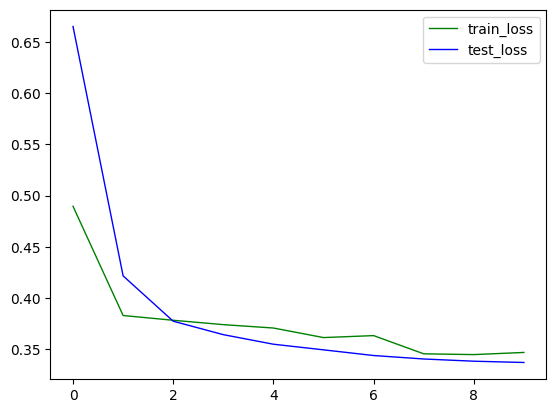

In [3]:
import matplotlib.pyplot as plt 
batch_num_train = range(0,len(train_loss))
batch_num_test = range(0,len(test_loss))

plt.plot(batch_num_test,test_loss , '-', linewidth=1.0, color='g')
plt.plot(batch_num_train,train_loss , '-', linewidth=1.0, color='b')
plt.legend(['train_loss','test_loss'], fontsize=10)
plt.show()

In [5]:
from exp.exp import EXP
from model.STTN import STTN
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
exp = EXP()
testloader = exp.testloader
model = exp.model
model.load_state_dict(torch.load("checkpoint/STTN.pkl"))
outputs= []
labels = []
with torch.no_grad():
    for (batch_x, batch_y,_) in testloader:
        batch_x = batch_x.float().to(device)
        output = model(batch_x)
        for y in output:
            outputs.append(y)
        for y in batch_y:
            labels.append(y)
print(outputs[0].shape)
print(labels[0].shape)

C:\Users\ROG\anaconda3\envs\python39\lib\site-packages\torch\nn\modules\rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


torch.Size([12, 25, 1])
torch.Size([12, 25, 1])


In [6]:
import numpy as np
sensor = 13
timestep = 11
preds = np.asarray([pred[timestep][sensor].detach().cpu().numpy() for pred in outputs])
labs  = np.asarray([label[timestep][sensor].cpu().numpy() for label in labels])
preds = preds.squeeze(-1)
labs = labs.squeeze(-1)
print("Data points:,", preds.shape)

Data points:, (2511,)


Text(0, 0.5, 'speed')

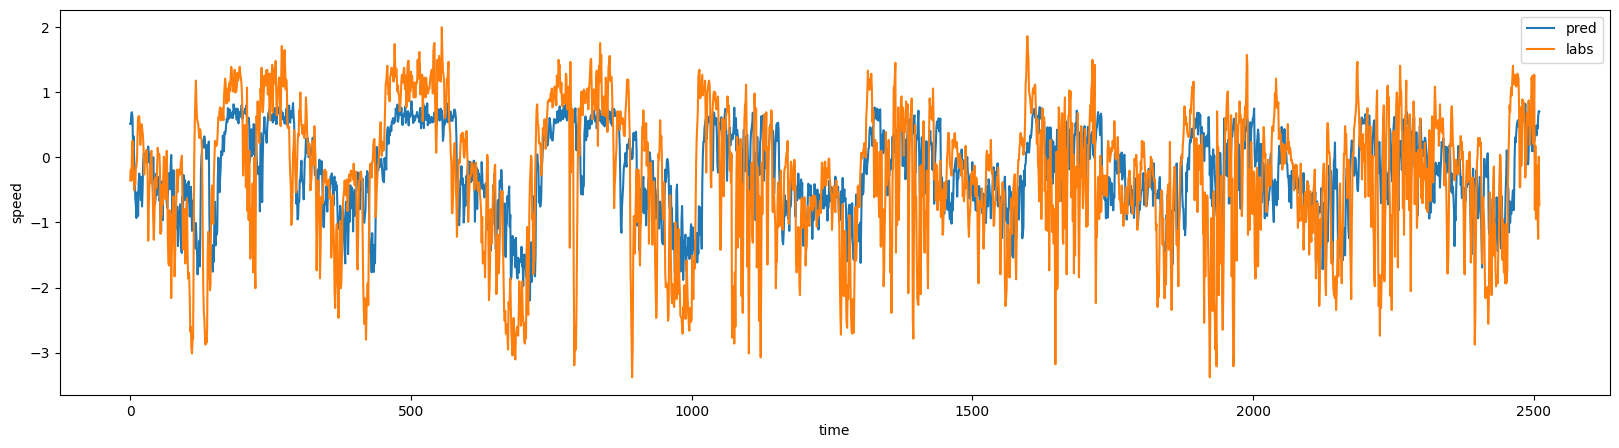

In [7]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.figure(figsize=(20,5))
sns.lineplot(data=preds, label="pred")
sns.lineplot(data=labs, label="labs")
plt.xlabel("time")
plt.ylabel("speed")